<a href="https://colab.research.google.com/github/diaputr/machine-learning/blob/main/UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

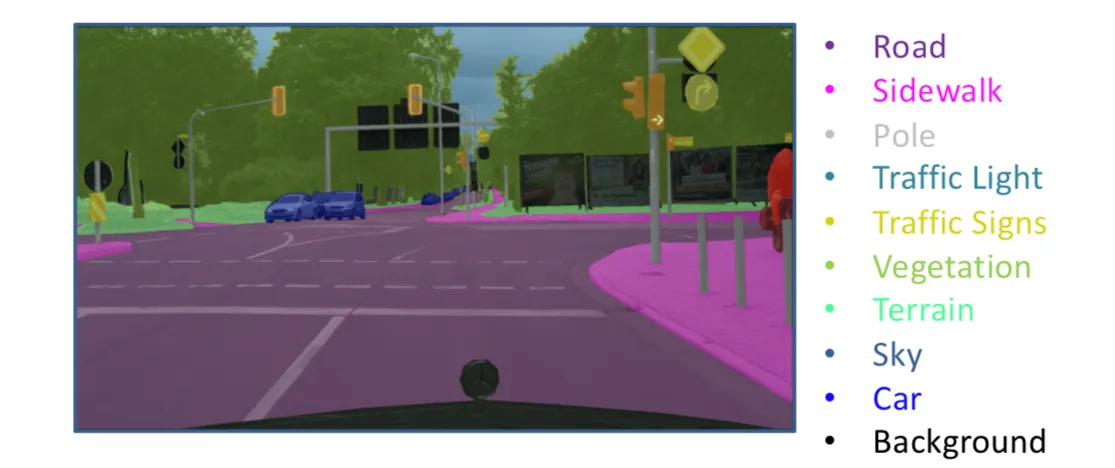

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

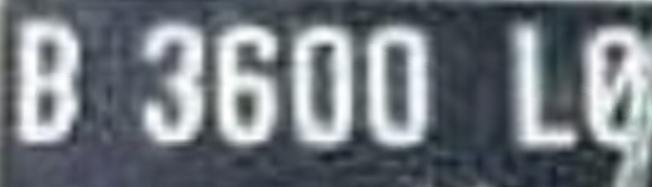

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/ML/UTS"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from numpy.random.mtrand import randint
from skimage.filters import threshold_otsu

In [ ]:
# menampung array untuk gambar
plates = []
# mencari semua file yang ada dalam folder dummy
for x in glob.glob(f'{path}/dummy/*.jpg'):
  # membaca file gambar
  n = cv.imread(x)
  n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
  # menambahkan gambar ke dalam list
  plates.append(n)

In [ ]:
img_rand = []
for r in range(5):
  rand = randint(0, len(plates))
  img_rand.append(plates[rand])

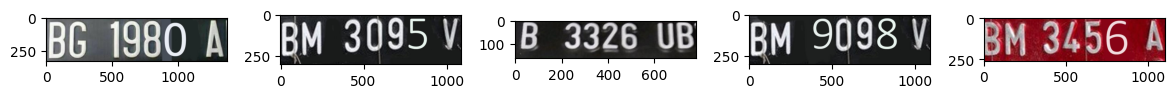

In [150]:
w, h = 12, 3
plt.figure(figsize=(w, h))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.tight_layout()
  plt.imshow(img_rand[i])
plt.show()

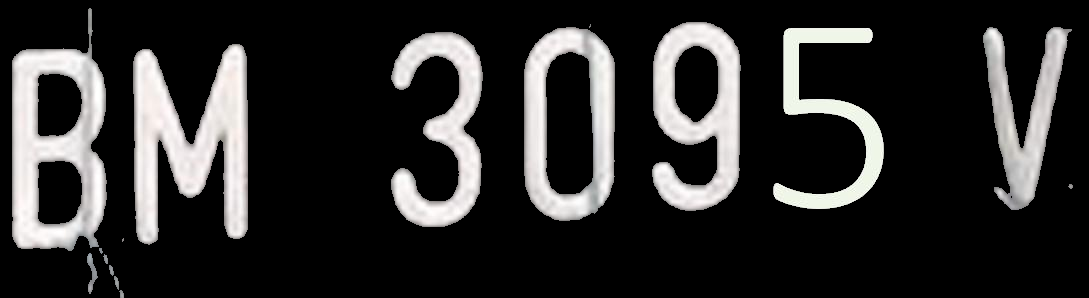

In [ ]:
def masking(img):
  light_white = (255, 255, 255)
  dark_white = (128, 128, 128)

  hsv_img0 = cv.cvtColor(img, cv.COLOR_RGB2HSV)
  gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  # Tentukan ambang (threshold) untuk binerisasi
  threshold_value = 128  # Nilai ambang yang Anda inginkan

  # Binerisasi
  _, binary_image = cv.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
  #tresholding
  mask = cv.inRange(img, dark_white, light_white)
  return cv.bitwise_and(img, img, mask=mask)

final = masking(img_rand[1])
cv2_imshow(final)

In [ ]:
def segmentasi(img):
  # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
  pixel_vals = img.reshape((-1,3))

  # Convert to float type
  pixel_vals = np.float32(pixel_vals)
  #the below line of code defines the criteria for the algorithm to stop running,
  #which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
  #becomes 85%
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

  # then perform k-means clustering with number of clusters defined as 3
  #also random centres are initially choosed for k-means clustering
  k = 2
  retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

  # convert data into 8-bit values
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]

  # reshape data into the original image dimensions
  return segmented_data.reshape((img.shape))

In [ ]:
segmentasi_img = []
for img in img_rand:
  n = segmentasi(img)
  segmentasi_img.append(n)

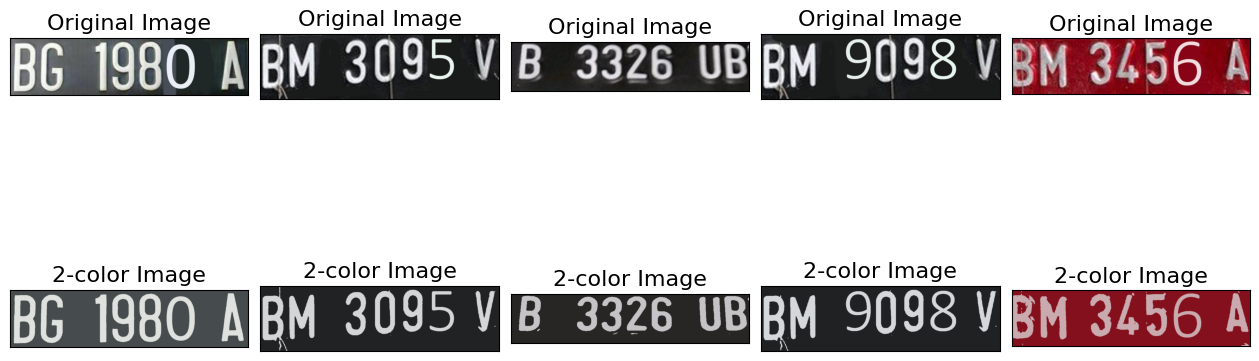

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
for i in range(len(img_rand)):
  ax[0][i].imshow(img_rand[i])
  ax[0][i].set_title('Original Image', size=16)

for j in range(len(segmentasi_img)):
  ax[1][j].imshow(segmentasi_img[j])
  ax[1][j].set_title('2-color Image', size=16)